<a href="https://colab.research.google.com/github/dl-ub-summer-school/2021/blob/main/Seminar_3_Logistic_regression_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning UB 2021 
## Семинар 3 -- Logistic regress-ийг машин сургалтын аргаар бодъё.


# Өмнөх дугаарт ....

## Регресс ба ангилал

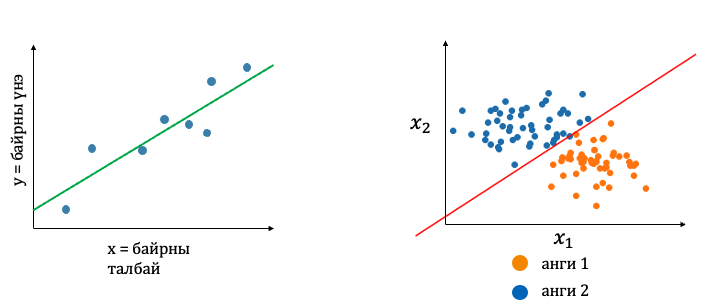

## Математикийн хэлээр


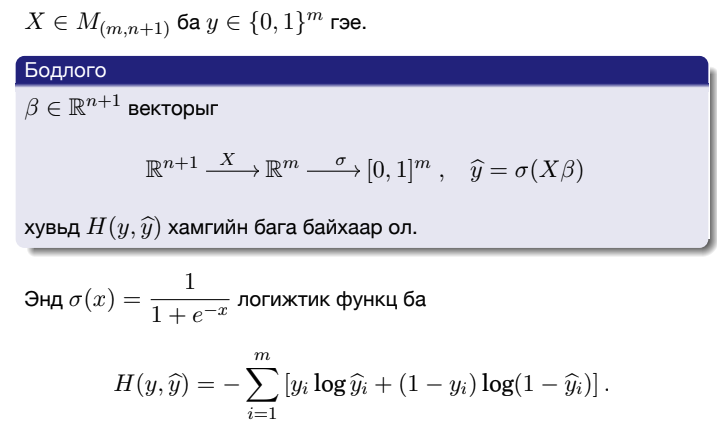

## Neural network дүрслэлээр  

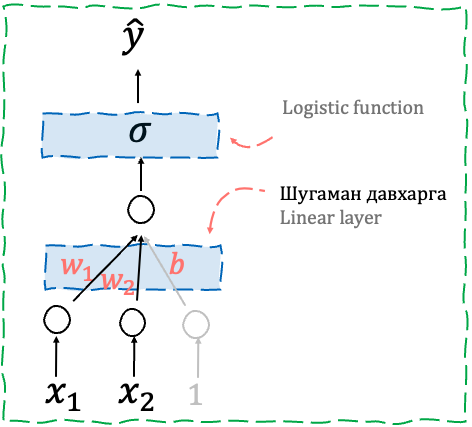

---
---
# За семинараа эхлэе! 



In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
# Өгөгдөлөө бэлдье. 
# 100 shirheg X, y uusgey 
# [-0.5, 0.5], [0.5, -0.5] tseguudiig  toirson random tseguud 

n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


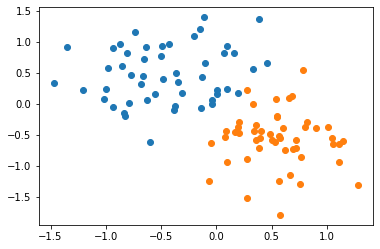

In [3]:
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

In [12]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)

  def forward(self, x):
    y_pred = self.linear(x)
    y_pred = torch.sigmoid(y_pred)
    return y_pred

  def get_params(self):
    [w, b] = self.parameters() 
    w1, w2 = w.view(2)
    return w1.item(), w2.item(), b.item()
  
  def plot_model(self, x, y):
    w1, w2, b = self.get_params()
    x1 = np.array([-2, 2])
    x2 = (w1*x1 + b)/(-w2) # HW 1: Decision boundary Homework 
    plt.plot(x1, x2, 'r')

    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    plt.show()

In [18]:
model = LogisticRegression()
model

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [19]:
model.get_params()

(-0.3798767924308777, -0.28682464361190796, -0.30946171283721924)

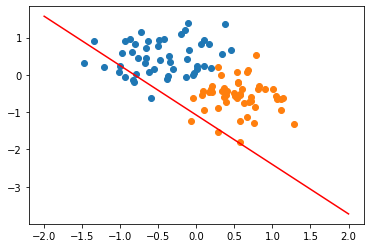

In [20]:
model.plot_model(X, y)

In [22]:
# Загвартаа өгөгдөл өгч үзье
y_pred = model.forward(x_data)
print(x_data[:5])
print(y_pred[:5])

tensor([[-0.1372, -0.0715],
        [ 0.8044, -0.3706],
        [-0.6022, -0.6194],
        [ 0.5709, -0.5120],
        [ 0.0064,  0.1533]])
tensor([[0.4411],
        [0.3755],
        [0.5242],
        [0.4063],
        [0.4120]], grad_fn=<SliceBackward>)


0 0.6071836352348328


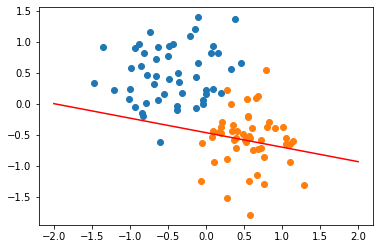

100 0.519342303276062


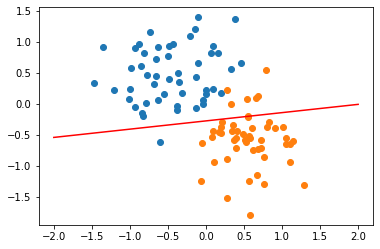

200 0.455748051404953


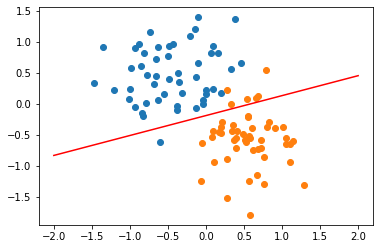

300 0.40817052125930786


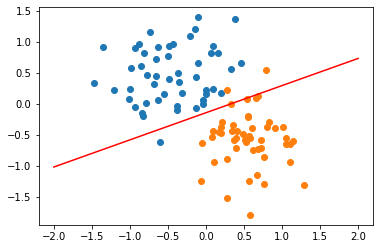

400 0.37141919136047363


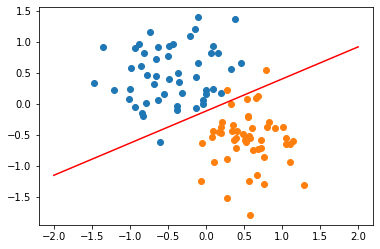

500 0.342218816280365


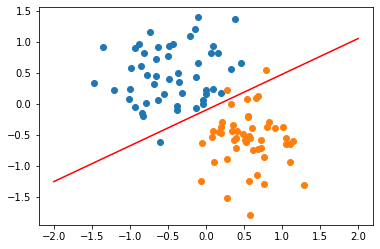

600 0.3184543550014496


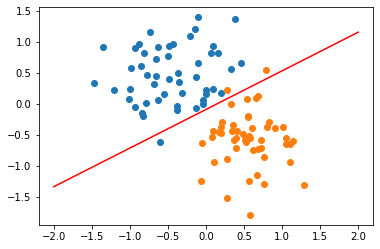

700 0.29871833324432373


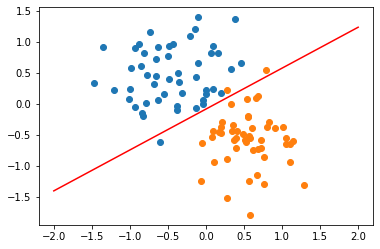

800 0.28204527497291565


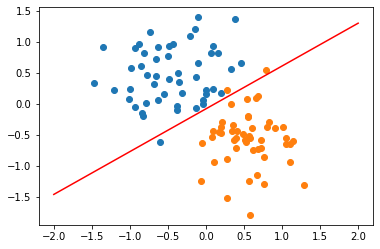

900 0.26775383949279785


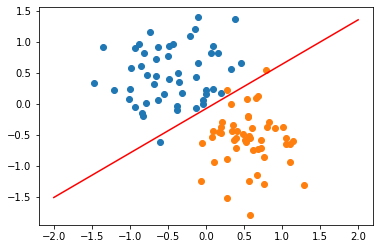

In [26]:
# Загвараа сургая
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epoch = 1000
losses = list()
BCEL = nn.BCELoss()

for i in range(epoch):

  y_pred = model.forward(x_data)
  S =BCEL(y_pred, y_data)

  optimizer.zero_grad()
  S.backward()
  optimizer.step()

  losses.append(S.item())

  if i % 100 == 0:
    print(i, S.item())
    model.plot_model(X, y)

Text(0.5, 0, 'epoch')

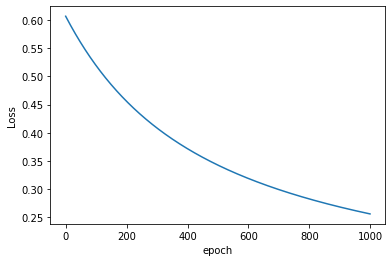

In [28]:
plt.plot(range(epoch), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')